In [247]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import ast
import cv2
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense, Flatten, Concatenate, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16


**1.Carga csv**

Se sacan las coordenadas de las regiones de interés de las imágenes del video 7


In [248]:
file_path = 'C:/Users/andre/Downloads/csv_final_video7.csv'
df = pd.read_csv(file_path)

df.head()

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes
0,surco-rouviere-244.jpg,102026,{},3,0,"{""name"":""rect"",""x"":298,""y"":192,""width"":336,""he...","{""Region"":""vesicula""}"
1,surco-rouviere-244.jpg,102026,{},3,1,"{""name"":""rect"",""x"":259,""y"":367,""width"":135,""he...","{""Region"":""surco""}"
2,surco-rouviere-244.jpg,102026,{},3,2,"{""name"":""rect"",""x"":519,""y"":55,""width"":179,""hei...","{""Region"":""segmento4""}"
3,surco-rouviere-326.jpg,108379,{},3,0,"{""name"":""rect"",""x"":298,""y"":64,""width"":233,""hei...","{""Region"":""vesicula""}"
4,surco-rouviere-326.jpg,108379,{},3,1,"{""name"":""rect"",""x"":142,""y"":250,""width"":170,""he...","{""Region"":""surco""}"


In [249]:
# Asegurarnos de que la columna 'label' exista
df['label'] = df['region_attributes'].apply(lambda x: ast.literal_eval(x).get('Region', ''))

df[['filename', 'label']].head()

,filename,label
0,surco-rouviere-244.jpg,vesicula
1,surco-rouviere-244.jpg,surco
2,surco-rouviere-244.jpg,segmento4
3,surco-rouviere-326.jpg,vesicula
4,surco-rouviere-326.jpg,surco


In [250]:
# Función para convertir las coordenadas del formato JSON a (x_min, y_min, x_max, y_max)
def convert_to_bounding_box(region_shape_attributes):
    shape_dict = ast.literal_eval(region_shape_attributes)
    x_min = shape_dict['x']
    y_min = shape_dict['y']
    x_max = x_min + shape_dict['width']
    y_max = y_min + shape_dict['height']
    return x_min, y_min, x_max, y_max

In [251]:


# Aplicar la función a cada fila del DataFrame y extraer las coordenadas
df['x_min'], df['y_min'], df['x_max'], df['y_max'] = zip(*df['region_shape_attributes'].map(convert_to_bounding_box))

# Asegurarnos de que la columna 'label' existe (si no se ha creado anteriormente)
df['label'] = df['region_attributes'].apply(lambda x: ast.literal_eval(x).get('Region', ''))

# Ahora que las columnas 'x_min', 'y_min', 'x_max', 'y_max', y 'label' están en el DataFrame,
df[['filename', 'x_min', 'y_min', 'x_max', 'y_max', 'label']].head()

,filename,x_min,y_min,x_max,y_max,label
0,surco-rouviere-244.jpg,298,192,634,426,vesicula
1,surco-rouviere-244.jpg,259,367,394,475,surco
2,surco-rouviere-244.jpg,519,55,698,210,segmento4
3,surco-rouviere-326.jpg,298,64,531,470,vesicula
4,surco-rouviere-326.jpg,142,250,312,420,surco


In [252]:
array_filename= df['filename'].unique()

In [253]:
array_filename.shape

(61,)

In [254]:
df.shape

(182, 12)

**Carga csv 2**

Se sacan las coordenadas de las regiones de interés de las imágenes del video 2

In [255]:
file_path2 = 'C:/Users/andre/Downloads/csv_final_video2.csv'
df2 = pd.read_csv(file_path2)

df2.head()


,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes
0,frame_15090.jpg,115668,{},3,0,"{""name"":""rect"",""x"":476,""y"":138,""width"":153,""he...","{""Region"":""vesicula""}"
1,frame_15090.jpg,115668,{},3,1,"{""name"":""rect"",""x"":338,""y"":277,""width"":132,""he...","{""Region"":""surco""}"
2,frame_15090.jpg,115668,{},3,2,"{""name"":""rect"",""x"":638,""y"":234,""width"":120,""he...","{""Region"":""segmento4""}"
3,frame_15103.jpg,128711,{},3,0,"{""name"":""rect"",""x"":454,""y"":145,""width"":143,""he...","{""Region"":""vesicula""}"
4,frame_15103.jpg,128711,{},3,1,"{""name"":""rect"",""x"":370,""y"":305,""width"":166,""he...","{""Region"":""surco""}"


In [256]:
# Asegurarnos de que la columna 'label' exista
df2['label'] = df2['region_attributes'].apply(lambda x: ast.literal_eval(x).get('Region', ''))

df2[['filename', 'label']].head()


,filename,label
0,frame_15090.jpg,vesicula
1,frame_15090.jpg,surco
2,frame_15090.jpg,segmento4
3,frame_15103.jpg,vesicula
4,frame_15103.jpg,surco


In [257]:
# Aplicar la función a cada fila del DataFrame y extraer las coordenadas
df2['x_min'], df2['y_min'], df2['x_max'], df2['y_max'] = zip(*df2['region_shape_attributes'].map(convert_to_bounding_box))

# Asegurarnos de que la columna 'label' existe (si no se ha creado anteriormente)
df2['label'] = df2['region_attributes'].apply(lambda x: ast.literal_eval(x).get('Region', ''))

# Ahora que las columnas 'x_min', 'y_min', 'x_max', 'y_max', y 'label' están en el DataFrame,
df2[['filename', 'x_min', 'y_min', 'x_max', 'y_max', 'label']].head()


,filename,x_min,y_min,x_max,y_max,label
0,frame_15090.jpg,476,138,629,475,vesicula
1,frame_15090.jpg,338,277,470,446,surco
2,frame_15090.jpg,638,234,758,382,segmento4
3,frame_15103.jpg,454,145,597,468,vesicula
4,frame_15103.jpg,370,305,536,439,surco


In [258]:
array_filename2= df2['filename'].unique()
array_filename2.shape

(135,)

In [259]:
df2.shape

(405, 12)

In [260]:
merged_df = pd.concat([df, df2], ignore_index=True)
merged_df.head()

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes,label,x_min,y_min,x_max,y_max
0,surco-rouviere-244.jpg,102026,{},3,0,"{""name"":""rect"",""x"":298,""y"":192,""width"":336,""he...","{""Region"":""vesicula""}",vesicula,298,192,634,426
1,surco-rouviere-244.jpg,102026,{},3,1,"{""name"":""rect"",""x"":259,""y"":367,""width"":135,""he...","{""Region"":""surco""}",surco,259,367,394,475
2,surco-rouviere-244.jpg,102026,{},3,2,"{""name"":""rect"",""x"":519,""y"":55,""width"":179,""hei...","{""Region"":""segmento4""}",segmento4,519,55,698,210
3,surco-rouviere-326.jpg,108379,{},3,0,"{""name"":""rect"",""x"":298,""y"":64,""width"":233,""hei...","{""Region"":""vesicula""}",vesicula,298,64,531,470
4,surco-rouviere-326.jpg,108379,{},3,1,"{""name"":""rect"",""x"":142,""y"":250,""width"":170,""he...","{""Region"":""surco""}",surco,142,250,312,420


In [261]:
merged_df.tail()

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes,label,x_min,y_min,x_max,y_max
582,frame_24361.jpg,106592,{},3,1,"{""name"":""rect"",""x"":407,""y"":404,""width"":139,""he...","{""Region"":""surco""}",surco,407,404,546,473
583,frame_24361.jpg,106592,{},3,2,"{""name"":""rect"",""x"":461,""y"":236,""width"":281,""he...","{""Region"":""segmento4""}",segmento4,461,236,742,359
584,frame_24462.jpg,121924,{},3,0,"{""name"":""rect"",""x"":119,""y"":126,""width"":346,""he...","{""Region"":""vesicula""}",vesicula,119,126,465,388
585,frame_24462.jpg,121924,{},3,1,"{""name"":""rect"",""x"":375,""y"":402,""width"":134,""he...","{""Region"":""surco""}",surco,375,402,509,463
586,frame_24462.jpg,121924,{},3,2,"{""name"":""rect"",""x"":471,""y"":228,""width"":251,""he...","{""Region"":""segmento4""}",segmento4,471,228,722,356


In [262]:
merged_df.shape

(587, 12)

**2.Carga de las imágenes**

In [263]:
images = []

In [264]:
# Directorio donde están almacenadas las imágenes
image_dir = 'C:/Users/andre/Documents/Video07/framesVideo/surco-rouviere'
image_dir2 = 'C:/Users/andre/Documents/Video02/framesVideo/extraccion'

In [265]:


# Directorio donde deseas guardar las imágenes seleccionadas
destination_directory = './durante-cirugia/'  

# Asegúrate de que el directorio de destino existe
if not os.path.exists(destination_directory):
    os.makedirs(destination_directory)

# Extraer y copiar los archivos seleccionados
for filename in array_filename:
    source_path = os.path.join(image_dir, filename)
    destination_path = os.path.join(destination_directory, filename)
    
    # Verifica si el archivo existe en el directorio original
    if os.path.exists(source_path):
        shutil.copy(source_path, destination_path)
    else:
        print(f"Advertencia: {filename} no se encontró en {image_dir}")

for filename in array_filename2:
    source_path = os.path.join(image_dir2, filename)
    destination_path = os.path.join(destination_directory, filename)
    
    # Verifica si el archivo existe en el directorio original
    if os.path.exists(source_path):
        shutil.copy(source_path, destination_path)
    else:
        print(f"Advertencia: {filename} no se encontró en {image_dir2}")

print("Proceso completado.")



Proceso completado.


In [266]:
def read_imageResize_with_labels(dir='..\database\dataset', target_size=(224, 224)):
    """
    Lee imágenes de un directorio, las redimensiona a 224x224 píxeles y las etiqueta según 
    la carpeta en la que se encuentran. Las imágenes son procesadas en escala de grises.

    Parámetros:
    dir (str): La ruta del directorio que contiene las carpetas 'antes-cirugia', 
               'durante-cirugia', y 'despues-cirugia'. Las carpetas deben estar en la 
               misma ubicación. Las carpetas no definidas recibirán una etiqueta de -1.

    Retorno:
    tuple: Una tupla que contiene dos elementos:
        - np.array: Un array de NumPy con las imágenes redimensionadas.
        - list: Una lista de etiquetas correspondientes a las imágenes.
    """
    labels = []
    imgs = []
    
    # Definir las carpetas y sus etiquetas correspondientes
    class_folders = {
        'antes-cirugia': 0,
        'durante-cirugia': 1,
        'despues-cirugia': 2
    }

    # Procesar cada carpeta en el directorio principal
    for folder, label in class_folders.items():
        folder_path = os.path.join(dir, folder)
        
        if not os.path.isdir(folder_path):
            print(f"Advertencia: {folder_path} no es un directorio válido.")
            continue
        
        # Procesar cada imagen en la carpeta
        for name_image in os.listdir(folder_path):
            # Obtener la ruta de la imagen
            image_path = os.path.join(folder_path, name_image)
            
            # Leer la imagen 
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            # Redimensionar la imagen
            image = cv2.resize(image, target_size, interpolation=cv2.INTER_LINEAR)
            image = image / 255.0

            # Agregar la imagen y su etiqueta a las listas
            imgs.append(image)
            labels.append(label)
    
    return np.array(imgs), labels

In [267]:
# Llamar a la función con la ruta adecuada
images, labels = read_imageResize_with_labels(dir='./')

# Verificar el tamaño de los arrays resultantes
print(f"Número de imágenes: {images.shape[0]}")
print(f"Tamaño de cada imagen: {images.shape[1:]}")

# Verificar las etiquetas
print(f"Etiquetas únicas: {set(labels)}")

Número de imágenes: 588
Tamaño de cada imagen: (224, 224, 3)
Etiquetas únicas: {0, 1, 2}


In [268]:
print(type(images[0]))

<class 'numpy.ndarray'>


In [269]:
import os

# Lista de imágenes en el directorio
images_in_directory = set(os.listdir(destination_directory))

# Lista de imágenes en el DataFrame
images_in_dataframe = set(merged_df['filename'].unique())

# Imágenes que están en el directorio pero no en el DataFrame
missing_in_dataframe = images_in_directory - images_in_dataframe

# Imágenes que están en el DataFrame pero no en el directorio
missing_in_directory = images_in_dataframe - images_in_directory

# Mostrar los resultados
print(f"Imágenes en el directorio pero no en el DataFrame: {len(missing_in_dataframe)}")
print(missing_in_dataframe)

print(f"Imágenes en el DataFrame pero no en el directorio: {len(missing_in_directory)}")
print(missing_in_directory)


Imágenes en el directorio pero no en el DataFrame: 0
set()
Imágenes en el DataFrame pero no en el directorio: 0
set()


**Procesamiento de la imágenes**

Se redimensionan a un tamaño de 224x224,se normalizan y adicionamente se obtienen las coordenadas de cada región de la imagen

In [270]:
def data_generator_coordinates(df, image_dir, input_size=(224, 224)):
    
    """
    Generador de datos para modelos de aprendizaje profundo que procesa imágenes y sus cuadros delimitadores.

    Parámetros:
    -----------
    df : pandas.DataFrame
        DataFrame con información de las imágenes y sus regiones de interés (coordenadas y etiquetas).
    image_dir : str
        Ruta del directorio donde se encuentran las imágenes.
    input_size : tuple, opcional
        Tamaño para redimensionar las imágenes (por defecto, (224, 224)).

    Yields:
    -------
    images : numpy.ndarray
        Array de imágenes redimensionadas y normalizadas.
    targets : dict
        Diccionario con cuadros delimitadores ('bounding_box') y etiquetas ('class_label').

    Descripción:
    ------------
    Redimensiona las imágenes y ajusta los cuadros delimitadores. Si una imagen tiene menos de tres regiones, 
    se añaden cuadros vacíos. Ideal para entrenar modelos con múltiples regiones por imagen.
    """


    images_now = []
    bbox_targets = []
    class_targets = []
    
    for filename in df['filename'].unique():
        print("nombre archivo: ",filename)
        image_path = os.path.join(image_dir, filename)

        #************************
       
        #****************************

         # Leer la imagen y redimensionarla
        image = cv2.imread(image_path)
        height, width = image.shape[:2]
        if image is None:
            print(f"Advertencia: No se pudo leer la imagen {filename}")
            continue
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, input_size, interpolation=cv2.INTER_LINEAR)
        image = image / 255.0
        
        df_image = df[df['filename'] == filename]
        bboxes = []
        labels = []
        
        for _, row in df_image.iterrows():
            label_map = {'vesicula': 0, 'surco': 1, 'segmento4': 2}
            label = label_map.get(row['label'], -1)
            x_scale = input_size[0] / width
            y_scale = input_size[1] / height
            
            x_min = row['x_min'] * x_scale
            y_min = row['y_min'] * y_scale
            x_max = row['x_max'] * x_scale
            y_max = row['y_max'] * y_scale
            
            bbox = [x_min, y_min, x_max, y_max]
            bboxes.append(bbox)
            labels.append(label)
        
        while len(bboxes) < 3:
            bboxes.append([0, 0, 0, 0])  # Cuadro delimitador vacío
            labels.append(-1)  # Etiqueta no válida


        images_now.append(image)
        bbox_targets.append(bboxes)
        class_targets.append(tf.keras.utils.to_categorical(labels, num_classes=3))
    
    images_now = np.array(images_now)
    bbox_targets = np.array(bbox_targets)
    class_targets = np.array(class_targets)
    
    return images_now, {"bounding_box": bbox_targets, "class_label": class_targets}

In [271]:

images_class1, targets = data_generator_coordinates(merged_df, image_dir=destination_directory, input_size=(224, 224))

nombre archivo:  surco-rouviere-244.jpg
nombre archivo:  surco-rouviere-326.jpg
nombre archivo:  surco-rouviere-347.jpg
nombre archivo:  surco-rouviere-494.jpg
nombre archivo:  surco-rouviere-503.jpg
nombre archivo:  surco-rouviere-640.jpg
nombre archivo:  surco-rouviere-1108.jpg
nombre archivo:  surco-rouviere-1426.jpg
nombre archivo:  surco-rouviere-1647.jpg
nombre archivo:  surco-rouviere-2662.jpg
nombre archivo:  surco-rouviere-3521.jpg
nombre archivo:  surco-rouviere-3778.jpg
nombre archivo:  surco-rouviere-4461.jpg
nombre archivo:  surco-rouviere-4780.jpg
nombre archivo:  surco-rouviere-5723.jpg
nombre archivo:  surco-rouviere-6440.jpg
nombre archivo:  surco-rouviere-7011.jpg
nombre archivo:  surco-rouviere-7522.jpg
nombre archivo:  surco-rouviere-2944.jpg
nombre archivo:  surco-rouviere-3584.jpg
nombre archivo:  surco-rouviere-4372.jpg
nombre archivo:  surco-rouviere-4791.jpg
nombre archivo:  surco-rouviere-5692.jpg
nombre archivo:  surco-rouviere-5819.jpg
nombre archivo:  surco

In [272]:
print(images.shape)

(588, 224, 224, 3)


In [273]:
images_class1

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 

In [274]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [275]:
targets

{'bounding_box': array([[[ 78.16393443,  89.6       , 166.29508197, 198.8       ],
         [ 67.93442623, 171.26666667, 103.3442623 , 221.66666667],
         [136.13114754,  25.66666667, 183.08196721,  98.        ]],
 
        [[ 78.16393443,  29.86666667, 139.27868852, 219.33333333],
         [ 37.24590164, 116.66666667,  81.83606557, 196.        ],
         [131.93442623,  41.06666667, 180.98360656, 114.8       ]],
 
        [[ 82.09836066,  36.4       , 131.93442623, 204.4       ],
         [ 36.98360656, 127.86666667,  87.60655738, 194.6       ],
         [134.81967213,  82.13333333, 192.52459016, 170.33333333]],
 
        ...,
 
        [[ 33.57377049,  36.86666667, 125.90163934, 188.06666667],
         [107.54098361, 192.26666667, 138.49180328, 223.53333333],
         [123.01639344, 116.66666667, 198.81967213, 169.4       ]],
 
        [[ 29.37704918,  55.06666667, 123.27868852, 178.73333333],
         [106.75409836, 188.53333333, 143.21311475, 220.73333333],
         [120.91803

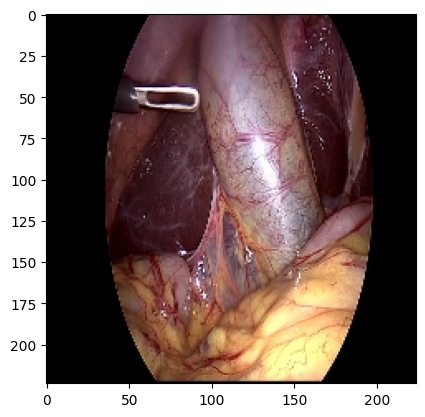

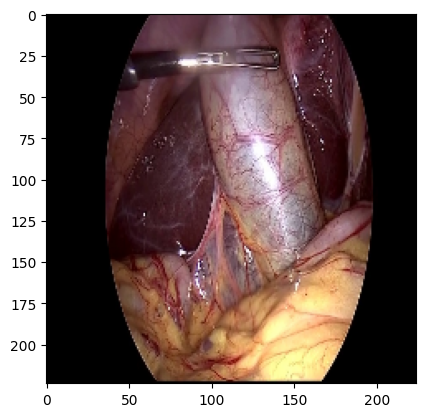

In [276]:
for i in range(2):
    plt.imshow(images[i])
    plt.show()

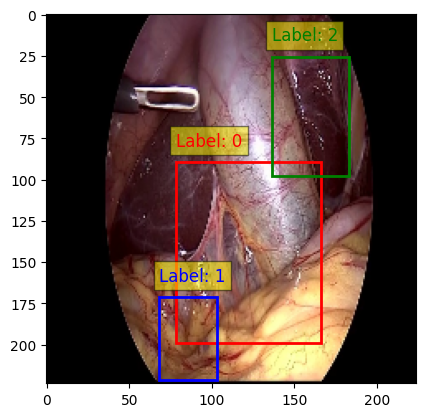

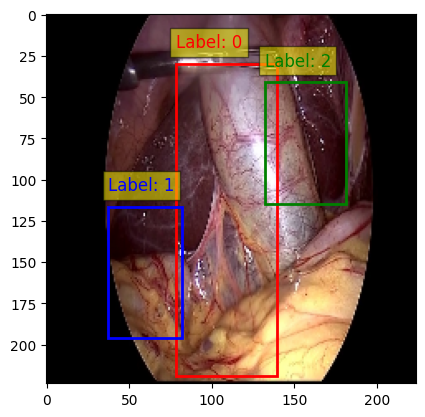

In [277]:
# Mostrar las imágenes y sus cuadros delimitadores ajustados
for i in range(2):
    plt.imshow(images[i])
    
    bbox_list = targets['bounding_box'][i]
    class_list = targets['class_label'][i]
    
    for bbox, class_label in zip(bbox_list, class_list):
        label = np.argmax(class_label)
        color = 'red' if label == 0 else ('blue' if label == 1 else 'green')
        plt.gca().add_patch(plt.Rectangle((bbox[0], bbox[1]), bbox[2] - bbox[0], bbox[3] - bbox[1], 
                                          edgecolor=color, facecolor='none', linewidth=2))
        plt.text(bbox[0], bbox[1] - 10, f"Label: {label}", color=color, fontsize=12, 
                 bbox=dict(facecolor='yellow', alpha=0.5))
    
    plt.show()

In [278]:
images.shape

(588, 224, 224, 3)

In [279]:
images_class1.shape

(196, 224, 224, 3)

**División train-test**

In [280]:
labels = np.array(labels)

In [281]:
# Supongamos que ya tienes las imágenes y etiquetas de las clases 0 y 2
# Ejemplo:
# images = np.array([...])  # Todas las imágenes (clases 0, 1, 2)
# labels = np.array([...])  # Etiquetas correspondientes (0, 1, 2)

# Filtrar las imágenes por clase
class_0_indices = np.where(labels == 0)[0]
class_2_indices = np.where(labels == 2)[0]

images_class_0 = images[class_0_indices]
images_class_2 = images[class_2_indices]


In [282]:
print(len(class_0_indices))

196


In [283]:
print(images_class_0)

[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]


 [[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0

In [284]:
# Combinar todas las imágenes en un solo array
images_combined = np.concatenate([images_class_0, images_class1, images_class_2], axis=0)

# Crear un array de coordenadas inicializado con ceros para todas las imágenes
# La forma será (total de imágenes, 3, 4) para las coordenadas
coordinates_combined = np.zeros((len(images_combined), 3, 4))

# Asignar las coordenadas correspondientes a las imágenes de clase 1 en el array combinado
coordinates_combined[len(images_class_0):len(images_class_0) + len(images_class1)] = targets['bounding_box']

# Crear las etiquetas combinadas
labels_combined = np.concatenate([labels[class_0_indices], np.ones(len(images_class1)), labels[class_2_indices]], axis=0)


In [285]:
# Paso 1: Dividir los datos de imágenes, etiquetas y coordenadas
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val, coord_train, coord_val = train_test_split(
    images_combined, labels_combined, coordinates_combined, test_size=0.2, random_state=42, stratify=labels_combined)

# Convertir las etiquetas a formato one-hot encoding
y_train_cat = to_categorical(y_train, num_classes=3)
y_val_cat = to_categorical(y_val, num_classes=3)

# Ahora puedes utilizar X_train, coord_train, y_train_cat para entrenar tu modelo



In [286]:
from collections import Counter 
# Verificar las proporciones en los conjuntos de entrenamiento, validación y prueba
print("Proporciones en el conjunto de entrenamiento:", Counter(y_train))
print("Proporciones en el conjunto de validación:", Counter(y_val))


Proporciones en el conjunto de entrenamiento: Counter({1.0: 157, 0.0: 157, 2.0: 156})
Proporciones en el conjunto de validación: Counter({2.0: 40, 1.0: 39, 0.0: 39})


In [287]:
print(type(coord_train))

<class 'numpy.ndarray'>


In [288]:
coord_val

array([[[ 96.26229508,  29.4       , 163.67213115, 175.        ],
        [104.39344262, 176.4       , 154.2295082 , 217.        ],
        [168.39344262, 126.93333333, 185.44262295, 165.66666667]],

       [[104.39344262,  45.26666667, 171.27868852, 162.86666667],
        [118.03278689, 163.33333333, 160.26229508, 206.73333333],
        [187.27868852,  91.46666667, 200.13114754, 146.53333333]],

       [[  0.        ,   0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ]],

       ...,

       [[  0.        ,   0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ]],

       [[  0.        ,   0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.

In [289]:
coord_train

array([[[ 68.72131148,  62.53333333, 115.14754098, 215.13333333],
        [ 44.59016393, 173.13333333,  70.03278689, 210.        ],
        [109.1147541 ,  42.46666667, 182.03278689, 153.06666667]],

       [[ 51.93442623,  11.2       , 112.        , 169.4       ],
        [ 89.44262295, 175.46666667, 118.03278689, 218.4       ],
        [117.24590164,  73.73333333, 153.70491803, 159.6       ]],

       [[ 79.73770492,   7.46666667, 143.21311475, 155.4       ],
        [ 85.50819672, 158.2       , 133.7704918 , 200.66666667],
        [146.62295082,  87.73333333, 166.03278689, 132.06666667]],

       ...,

       [[  0.        ,   0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ]],

       [[  0.        ,   0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.

In [300]:
y_train

array([1., 1., 1., 2., 0., 0., 2., 1., 2., 0., 2., 1., 0., 1., 1., 2., 1.,
       2., 1., 0., 2., 0., 1., 1., 1., 2., 1., 0., 0., 2., 0., 2., 2., 0.,
       2., 2., 0., 1., 2., 0., 0., 0., 1., 2., 0., 0., 1., 0., 0., 0., 1.,
       2., 2., 2., 0., 0., 2., 0., 1., 2., 0., 0., 1., 0., 2., 2., 1., 1.,
       2., 1., 2., 2., 0., 1., 1., 1., 1., 1., 0., 1., 2., 2., 0., 1., 2.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 2., 1., 0., 0., 1., 2.,
       0., 0., 2., 0., 0., 0., 1., 2., 0., 1., 0., 0., 1., 1., 2., 0., 2.,
       1., 0., 0., 2., 0., 1., 0., 1., 0., 1., 0., 2., 1., 1., 1., 0., 1.,
       2., 2., 2., 0., 1., 0., 2., 0., 1., 2., 2., 2., 0., 1., 1., 1., 2.,
       0., 2., 0., 0., 1., 2., 1., 0., 2., 1., 1., 1., 1., 2., 0., 1., 2.,
       2., 1., 0., 1., 1., 0., 1., 2., 0., 2., 2., 2., 0., 2., 0., 0., 0.,
       0., 2., 0., 0., 1., 0., 1., 1., 1., 2., 2., 2., 2., 1., 2., 2., 0.,
       2., 2., 0., 2., 0., 2., 1., 2., 0., 2., 2., 0., 0., 2., 0., 1., 0.,
       1., 1., 0., 2., 2.

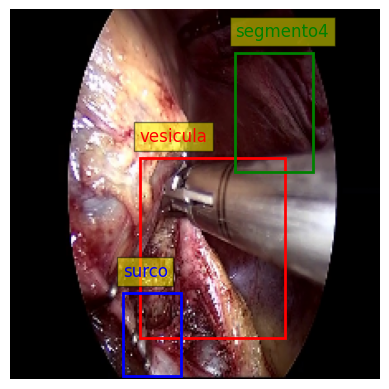

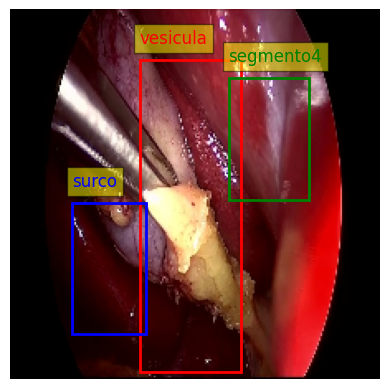

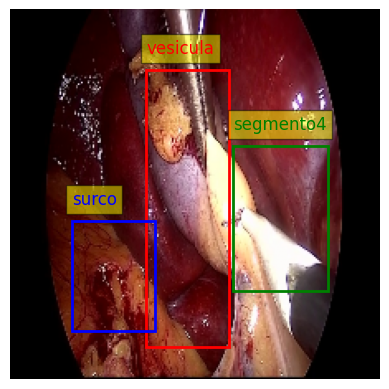

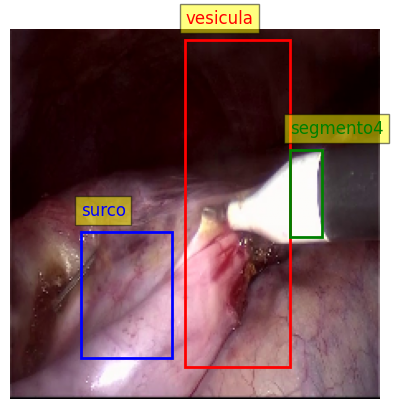

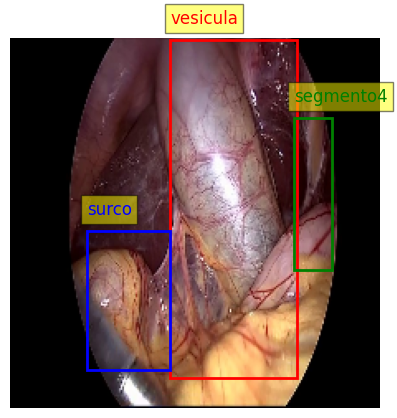

In [301]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_images_with_bboxes(X_train, targets, num_images=5):
    """
    Visualiza imágenes de X_train con sus respectivas regiones delimitadoras y muestra la etiqueta de la región.

    Parámetros:
    -----------
    X_train : np.ndarray
        Array de imágenes de entrenamiento.
    targets : dict
        Diccionario que contiene las coordenadas de las cajas delimitadoras ('bounding_box') y las etiquetas ('class_label').
    num_images : int, opcional
        Número de imágenes a visualizar (por defecto, 5).
    """
    # Diccionario para mapear las etiquetas a nombres
    label_map = {0: 'vesicula', 1: 'surco', 2: 'segmento4'}
    
    for i in range(num_images):
        plt.imshow(X_train[i])
        
        bbox_list = targets['bounding_box'][i]
        class_list = targets['class_label'][i]
        
        for bbox, class_label in zip(bbox_list, class_list):
            label = np.argmax(class_label)
            label_text = label_map.get(label, "Unknown")
            color = 'red' if label == 0 else ('blue' if label == 1 else 'green')
            
            # Dibujar la bounding box
            plt.gca().add_patch(plt.Rectangle(
                (bbox[0], bbox[1]), bbox[2] - bbox[0], bbox[3] - bbox[1], 
                edgecolor=color, facecolor='none', linewidth=2))
            
            # Mostrar la etiqueta sobre la bounding box
            plt.text(bbox[0], bbox[1] - 10, label_text, color=color, fontsize=12, 
                     bbox=dict(facecolor='yellow', alpha=0.5))
        
        plt.axis('off')  # No mostrar ejes
        plt.show()

# Ejemplo de uso con tus datos
visualize_images_with_bboxes(X_train, targets, num_images=5)


**Entrenamiento de modelo de transfer learning**

In [330]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Congelar capas preentrenadas

# Entrada para las imágenes
image_input = base_model.input

# Entrada para las coordenadas (3 sets de coordenadas para cada imagen)
coord_input = Input(shape=(3, 4), name='coord_input')

# Extraer características de la imagen
x = base_model.output
x = Flatten()(x)

# Aplanar las coordenadas para la concatenación
coord_flat = Flatten()(coord_input)

# Concatenar características de imagen y coordenadas
combined = Concatenate()([x, coord_flat])

# Añadir capas densas finales
x = Dense(32, activation='relu')(combined)
x = Dropout(0.5)(x)
output = Dense(3, activation='softmax')(x)



In [331]:
# Crear el modelo
model = Model(inputs=[image_input, coord_input], outputs=output)



In [332]:
# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()



Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 224, 224, 64  1792        ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 224, 224, 64  36928       ['block1_conv1[0][0]']           
                                )                                                           

In [333]:
# Paso 4: Entrenar el modelo
history = model.fit(
    [X_train, coord_train], y_train_cat,
    epochs=10,
    validation_data=([X_val, coord_val], y_val_cat))

Epoch 1/10
15/15 [==============================] - 3s 153ms/step - loss: 1.2204 - accuracy: 0.5872 - val_loss: 0.4313 - val_accuracy: 0.8644
Epoch 2/10
15/15 [==============================] - 2s 133ms/step - loss: 0.4748 - accuracy: 0.8064 - val_loss: 0.1824 - val_accuracy: 0.9407
Epoch 3/10
15/15 [==============================] - 2s 134ms/step - loss: 0.4629 - accuracy: 0.7489 - val_loss: 0.1683 - val_accuracy: 1.0000
Epoch 4/10
15/15 [==============================] - 2s 132ms/step - loss: 0.4245 - accuracy: 0.7830 - val_loss: 0.1242 - val_accuracy: 1.0000
Epoch 5/10
15/15 [==============================] - 2s 147ms/step - loss: 0.4072 - accuracy: 0.8064 - val_loss: 0.0958 - val_accuracy: 1.0000
Epoch 6/10
15/15 [==============================] - 2s 142ms/step - loss: 0.3876 - accuracy: 0.8085 - val_loss: 0.0893 - val_accuracy: 1.0000
Epoch 7/10
15/15 [==============================] - 2s 153ms/step - loss: 0.3757 - accuracy: 0.8149 - val_loss: 0.0870 - val_accuracy: 1.0000
Epoch 

**Métricas**

In [334]:
# Visualización de curvas de pérdida y precisión
def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Curves')
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Curves')
    
    plt.show()

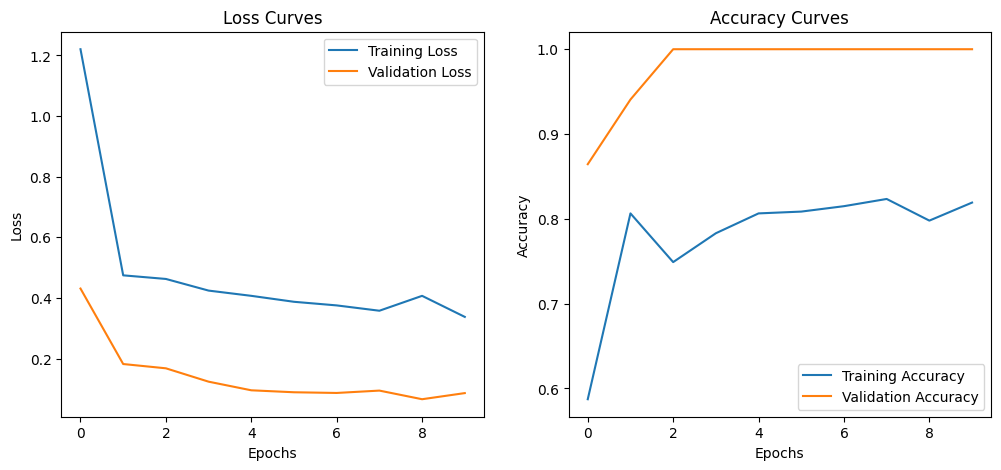

In [335]:
plot_training_history(history)

In [336]:
from sklearn.model_selection import cross_val_score